In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import bernoulli

In [2]:
x_first = np.linspace(start=0,stop=50,num=30)

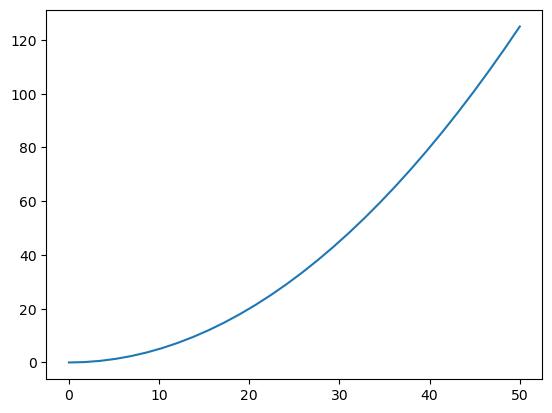

In [3]:
plt.plot(x_first, 0.05*x_first**2)

In [4]:
y = 0.05*x_first**2

In [5]:
y.shape

(30,)

In [6]:
for i in range(30):
    random=10*bernoulli.rvs(p=1/2)-1
    y[i] = y[i] + np.random.normal(loc=random, scale=20)

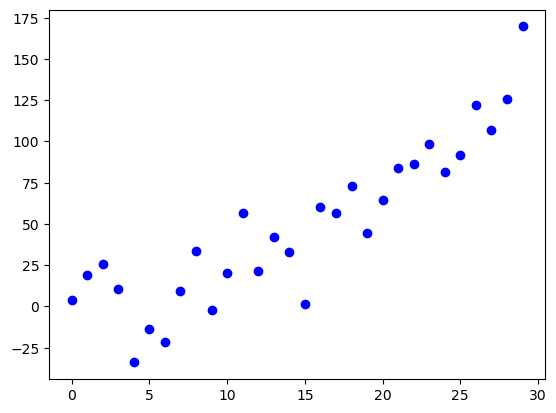

In [7]:
plt.plot(y,'bo')

In [8]:
def rbf_kernel(x=0,y=0,l=1):
    """to apply a rbf kernel

    Parameters
    --------------------------
    x : array-like
    a vector

    y : array-like
    a vector

    l : float
    scale parameter
    ---------------------------
    """
    d = np.exp(np.linalg.norm(x-y))/(2*l**2)
    return d

In [9]:
matrix_K = np.empty((30,30))

In [10]:
for i in range(30):
    for j in range(30):
        matrix_K[i,j] = rbf_kernel(x=x_first[i],y=x_first[j],l=3)

In [11]:
inverse_mat = np.linalg.inv(matrix_K + 30*0.01*np.eye(30))

In [12]:
alpha_hat = np.matmul(np.transpose(y),inverse_mat)

In [13]:
x_test = np.linspace(start=0,stop=50,num=500)

In [14]:
def matrix_K_test(data,test,scale=1):
    """a function to create the test kernel matrix

    Parameters
    ---------------------------------
    data : array-like object,
    the data used to compute alpha_hat

    test : float (in this case, not an off-the-shelf function)
    the point to which we want to compute the distance

    scale : float, non zero
    the parameter to use in the kernel
    --------------------------------
    """
    dim = data.shape[0]
    mat = np.empty(dim)
    for i in range(dim):
        mat[i] = rbf_kernel(data[i],y=test,l=scale)
    return mat.reshape(dim,1)

In [17]:
plt.plot(y=np.transpose(alpha_hat)@matrix_K_test(data=x_first,test=x,scale=1))

NameError: name 'x' is not defined

In [ ]:
np.array((1,1,1,2)).reshape(2,2)